### TODO

##### Check
- Check that  formula units are not being double counted.
- Cross check our sulfur results with Adam.
- Double check the settings  used  for  our  calculations
- All comparison studies were done with VASP - perhaps try to reproduce
binary compounds using this. It may be that the plane wave cutoff needs to
be pushed right up, Materials project uses 520eV (Jonathan uses 550 eV for the tin
 sulfides).
- Double check the thermal properties also? And other quantities - other
errors may be more difficult to spot as we will have less to compare against...


##### Investigate

- Dependence on functional (what impact do hybrid energetics have?)
- Formation of other ternary compounds.

## Ba + Zr + 3s <-> BaZrS3

In [1]:
import numpy as np
from thermopot import materials, calculations, reactions, potentials, potential

In [2]:
BaZrS3_calc = calculations.Calculation(volume=0.487976E+03,energy=-1425525.405951922,xc='pbesol',NAtoms=20)
Ba_calc = calculations.Calculation(volume=0.564599E+02,energy=-225060.517335015, xc='pbesol',NAtoms=1)
Zr_calc = calculations.Calculation(volume=0.448970E+02,energy=-197453.101608662,xc='pbesol',NAtoms=2)
S_calc = calculations.Calculation(energy=-0.347575504588933e06,xc="pbesol",NAtoms=32,volume=832.91786077871541)


In [3]:
BaZrS3 = materials.Solid("BaZrS3",{"Ba": 1,"Zr": 1,"S":3},
                                                          "."
                                                          "./BaZrS3/phonopy_output/BaZrS3_Pnma.dat",calculation=BaZrS3_calc)
Ba = materials.Solid("Ba",{"Ba": 1},"../BaZrS3/phonopy_output/Ba_Im-3m.dat",calculation=Ba_calc)
Zr = materials.Solid("Zr",{"Zr": 1},"../BaZrS3/phonopy_output/Zr_P63_mmc"
                                    ".dat",calculation=Zr_calc)
S = materials.Solid("S",{"S":1},"../BaZrS3/phonopy_output/S_adam.dat",
                    calculation=S_calc)

In [4]:
bulk_reaction = reactions.Reaction({Ba:1,Zr:1,S:3},{BaZrS3:1})
bulk_reaction.DH().potential / 5

-1.8176382594858296

In [5]:
bulk_reaction = reactions.Reaction({Ba:1,Zr:1,S:3},{BaZrS3:1},temperature=0,pressure=0)
bulk_reaction.DU().potential / 5

-1.8163971290341578

The above figure compares to a formation energy of -1.818 eV/atom reported on the materials project. -9.08/5 = -2.27.

In [6]:
T = np.linspace(100,1000,100) # K
P = np.array( np.logspace(-3,6,100),ndmin=2).transpose() # Pa

bulk_reaction = reactions.Reaction({Ba:1,Zr:1,S:3},{BaZrS3:1},temperature=T,pressure=P)

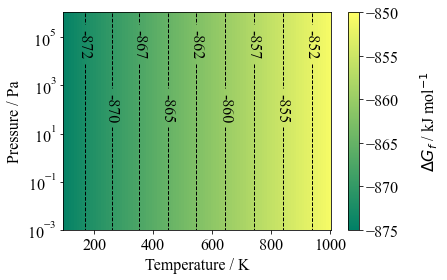

In [7]:
GFE = bulk_reaction.Dmu(units="kJ")
GFE.plot_TvsP(scale_range=[-875,-850])

The above Gibbs formation energy is in the -9eV range, and shifts by an amount
(~25kJ) comparable to the CZTS study (~30kJ), with a weak dependence  on
Pressure, as expected.

## 2Ba+2Zr+3S2 <-> 2BaZrS3

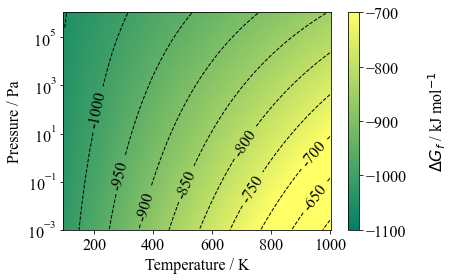

In [8]:
S2 = materials.IdealGas("S2",{'S':2},thermo_file="../BaZrS3/nist_janaf/S2.dat",energies={"pbesol":-0.217220682510473e05},zpe_pbesol=0.04421415)
S2_reaction = reactions.Reaction({Ba:2,Zr:2,S2:3},{BaZrS3:2},temperature=T,pressure=P,fu=2)
GFE = S2_reaction.Dmu(units="kJ")
GFE.plot_TvsP(scale_range=[-1100, -700])

Again, there is agreement here with what would be expected from the CZTS
study. For the sulphur gas there is a greater variation with both
temperature and pressure. However it is stable in all regimes. In general
BaZrS3 shows increased stability compared to CZTS, which is to be expected
from previous reports.


# 8Ba + 8Zr + 3S8 <-> 8BaZrS3

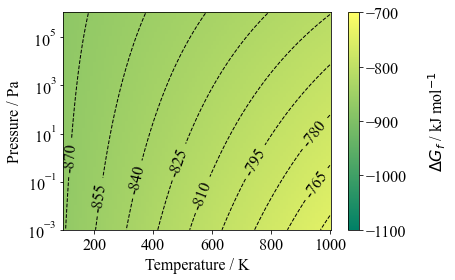

In [9]:
S8 = materials.IdealGas("S8",{'S':8},thermo_file="../BaZrS3/nist_janaf/S8"
                                                 ".dat",
                        energies={"pbesol":-86893.631040193},zpe_pbesol=0.32891037)
S8_reaction = reactions.Reaction({Ba:8,Zr:8,S8:3},{BaZrS3:8},temperature=T,
pressure=P,fu=8)
GFE = S8_reaction.Dmu(units="kJ")
GFE.plot_TvsP(scale_range=[-1100, -700])

There is again a similar trend as to that seen for CZTS, with increased
stability of BaZrS3 in an S8 environment.


It would be nice to understand the different contributions that S2 and S8
make to the Gibbs formation energy - perhaps a plot with a breakdown of the
U, ST and PV terms would give greater insight.

# BaS + ZrS2 <-> BaZrS3

These are the binaries typically used as Ba is formally a +2 cation and Zr
is formally a 4+ cation.

In [10]:
BaS_calc = calculations.Calculation(volume=0.632552E+02,energy=-235926.586148547, xc='pbesol',NAtoms=2)
ZrS2_calc = calculations.Calculation(volume=0.667493E+02,energy=-120454.748375135,xc='pbesol',NAtoms=3)
BaS = materials.Solid("BaS",{"Ba": 1, "S": 1},"../BaZrS3/phonopy_output/BaS_Fm-3m.dat",calculation=BaS_calc)
ZrS2 = materials.Solid("ZrS2",{"Zr": 1,"S": 2}, "../BaZrS3/phonopy_output/ZrS2_P-3m1.dat",calculation=ZrS2_calc)

In [11]:
bulk_reaction = reactions.Reaction({BaS:1,ZrS2:1},{BaZrS3:1},temperature=0,pressure=0)
bulk_reaction.DH(units="eV").potential

-0.024347924685571343

The perovskite is not as stable against decomposition into binary phases as
expected. Previously reported energies are in the range -450 to -200 meV per fu (https://onlinelibrary.wiley.com/doi/full/10.1002/adom.202101704).

To move our calculated number closer to those previously reported we need to
either: i) reduce (make more negative) the energy of BaZrS3 or ii) increase
(make less negative) the energy of the binary reactants.

The value we have calculated above has been verified by hand. If we do not
include U_func (from the phonon calculation at T=0) then the calculated energy increases to -16.96meV.



In [12]:
(-1425525.405951922/4)-(-235926.586148547+-120454.748375135)

-0.016964298498351127

Let's compare the calculated DFT energies to those on the materials project.

The uncorrected DFT energy for BaZrS3 (20 atoms) is -127.5651 eV. For BaS it is -10.2125 eV (2 atoms). For ZrS2 it is
-21.3614 eV (3 atoms). If we calculate the change in energy:

In [13]:
-10.2125 + -21.3614 - (-127.5651/4)

0.3173749999999984

Ok, so that is 317 meV which is the same as that reported in the Scragg
review.

Furthermore, we can see that the energetics for the BaS and ZrS2 for our
study do not look quite correct. MP has BaS = -10.2125, ZrS2 = -21.3614. We
have BaS = -235926.586148547 (2 atoms), ZrS2 = -120454.748375135 (3 atoms),
BaZrS3 = -1425525.405951922 (20 atoms).

MP BaS: -2.410 eV, ZrS2: -1.956 eV/atom
OQMD: BaS: -2.225 eV/atom, ZrS2: -1.709 eV/atom, BaZrS3: -1.982 eV/atom


In [14]:
-1.982*5 - (-1.709*3+-2.225*2)

-0.3329999999999984

One difference to consider might be the DFT code used. Huo (520eV cutoff) and
Meng (400eV cutoff) use VASP, filippone doesn't say what they use (!),
Materials Project (520eV
cutoff) and OQMD (520eV) use VASP.

We can also get energies from the NOMAD database:

BaS: -235926.086754954 eV (https://nomad-lab
.eu/prod/v1/gui/search/entries/entry/id/p8nVstufTHGfaR4r0DQ9fQ/zN_LvlZMqDuLDXIxz6JProkWUk6w/raw)

ZrS2: -120454.548076675 eV (https://nomad-lab.eu/prod/v1/gui/search/entries/entry/id/CLCkTK2dQuuL1G1IReJSZw/kRN3qUtYxBVvYQAQ1gCbQFUJlkAG/raw)

Theres no FHI-aims calculation for BaZrS3.

Let's try and use these values in our calculation:

In [15]:
(-1425525.405951922/4)-(-235926.086754954+-120454.548076675)

-0.7166563515202142

Ok, so now the perovskite is more stable **however** we can't really trust
this number as  we don't know what the perovskite total energy would be
using their method. Let's instead compare the ratio of the BaS and ZrS2.

In [16]:
# BaS/ZrS2
-235926.086754954 / -120454.548076675

1.9586316209893206

In [17]:
-235926.586148547 / -120454.748375135

1.9586325099762394

They are both almost exactly the same! So this is weird. Why is this the
ratio using FHI-aims, whilst for VASP (Materials project) it is:

In [18]:
# BaS / ZrS2 (MP)
-10.2125/-21.3614

0.4780819609201644

In [19]:
# OQMD
(-5.106*2) / (-7.114*3)

0.47849311217317964

It could  be linked to the cutoffs used in the plane wave calculations. For
layered compounds (like the ZrS2) the cutoff may be quite high: https://www
.ncbi.nlm.nih.gov/pmc/articles/PMC5507937/.

The Jarvis database has carefully converged calculations for layered
materials. for convergenve to 0.001eV a 600eV plane wave cutoff was required
 (https://www.ctcms.nist.gov/~knc6/static/JARVIS-DFT/JVASP-82.xml).

The other option is that it is linked to the volume of the material.

OQMD: ZrS2: 23.626 / atom, BaS: 33.483
MP: ZrS2: 25.999 / atom, BaS: 33.655
Our calcs: ZrS2: 22.24977 / atom, BaS: 31.6276
NoMAD: ZrS2: 22.5044 / BaS: 32.09555

It's worth noting  that the NoMAD relaxation used the MP structure as a
starting point.

Other comparisons could include the k-point grid used: 10 10 10 from OQMD,

All calculations using pbesol.

It may be worth looking at the settings discussed in this document:
https://th.fhi-berlin.mpg.de/th/Meetings/DFT-workshop-Berlin2011/presentations/2011-07-14_tutorial2_handout.pdf.

We could compare to experimental formation energies:

BaS : -2.436 eV/atom (from OQMD experimental entry)
-2.225 eV/atom (from OQMD calculated entry)

From our calculation:

In [20]:
(-235926.586148547- (-225060.517335015+ -0.347575504588933e06/32)) / 2

-2.1671475639304845

We expect there to be some discrepancy due to finite temperature
effects  (entropy and  volume dependence) and inexact
exchange-correlation functions. Our value is not  as close to the
experimental value. However  if our  value moved more negative (towards the
experimental value) then the perovskite would become even more unstable...

ZrS2:  -1.993 eV/atom (from the OQMD experimental entry)
 -1.709 eV/atom (from the OQMD calculated entry)

From our calculation:


In [21]:
(-120454.748375135-(-197453.101608662/2+(-0.347575504588933e06/16)))/3

-1.5761779985623434

BaZrS3: -1.982 eV/atom (OQMD calculated energy)

In [22]:
(-1425525.405951922/4-(-197453.101608662/2+-225060.517335015+-0.347575504588933e06/32+-0.347575504588933e06/16)) / 5

-1.8159586844150908

In [23]:
# OQMD stability - our calculated stability
d1=-2.225--2.1671475639304845    #  BaS
d2=-1.709--1.5761779985623434    #  ZrS2
d3=-1.982--1.8159586844150908    # BaZrS3

In [24]:
print(d1,d2,d3)

-0.05785243606951562 -0.13282200143765666 -0.1660413155849092


There seems to be a consistent underestimation of the stability of the
compounds. I'd expect there to be some cancellation on either side of the
equation but  this is not the case, suggesting that there are errors in  the
 reference point (elemental compounds) used.




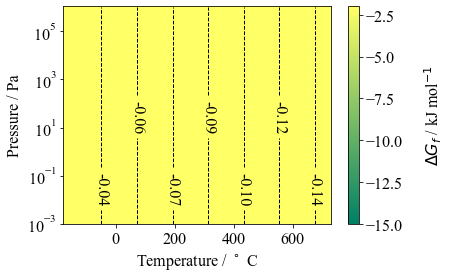

In [25]:
bulk_reaction = reactions.Reaction({BaS:1,ZrS2:1},{BaZrS3:1},temperature=T,
                                   pressure=P)
GFE = bulk_reaction.Dmu(units="eV")
GFE.plot_TvsP(scale_range=[-15, -2],precision="%.2f",T_units="C")

The thing to note here is that chemical accuracy is around 4kJ/mol. So this
is telling us that around room temperature the

# BaS2 + ZrS <-> BaZrS3

Note that we are using the more stable of the ZrS compounds

In [26]:
BaS2_calc = calculations.Calculation(volume=0.168953E+03,energy=-493576.992662581, xc='pbesol',NAtoms=6)
ZrS_calc = calculations.Calculation(volume=0.691428E+02,energy=-219183.017830408,xc='pbesol',NAtoms=4)
BaS2 = materials.Solid("BaS2",{"Ba": 1, "S": 2},"."
                                               ""
                                               "./BaZrS3/phonopy_output/BaS2_C2_c.dat",calculation=BaS2_calc)
ZrS = materials.Solid("ZrS",{"Zr": 1,"S": 1}, "."
                                               ""
                                              "./BaZrS3/phonopy_output/ZrS_P4_nmm.dat",
                      calculation=ZrS_calc)

In [27]:
bulk_reaction = reactions.Reaction({BaS2:1,ZrS:1},{BaZrS3:1},temperature=0,
                                   pressure=0)
bulk_reaction.DH(units="eV").potential

-1.3552561679389328

This number has been verified by hand as 1.34624179604
(not taking into account any phonon contributions).

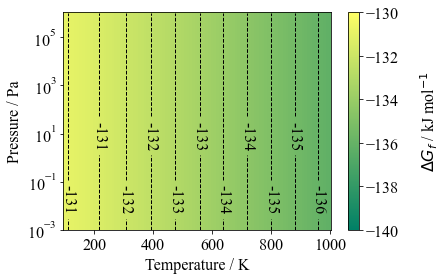

In [28]:
T = np.linspace(100,1000,100) # K
P = np.array( np.logspace(-3,6,100),ndmin=2).transpose() # Pa
bulk_reaction = reactions.Reaction({BaS2:1,ZrS:1},{BaZrS3:1},temperature=T, pressure=P)
GFE = bulk_reaction.Dmu(units="kJ")
GFE.plot_TvsP(scale_range=[-140, -130])

The interesting thing here is that the material becomes more stable as the
temperature increases. This is opposite to the trends seen so far - can it
be reasoned using arguments from thermodynamics?

Some discussion on whether entropy can stabilise reactants more than
products here: https://iopscience.iop.org/article/10.1088/1361-6463/aae1ee/meta

# 2BaS + 2ZrS + S2 <-> 2BaZrS3


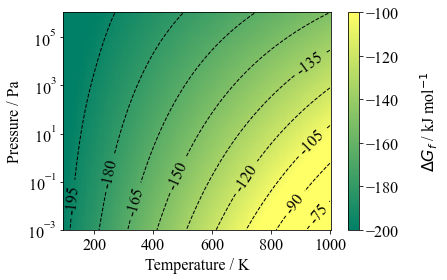

In [29]:
S2_binary_reaction = reactions.Reaction({BaS:2,ZrS:2,S2:1},{BaZrS3:2},
                                       temperature=T, pressure=P,fu=2)
GFE = S2_binary_reaction.Dmu(units="kJ")
GFE.plot_TvsP(scale_range=[-200, -100])

This is getting interesting now, as we are approaching a high temperature
regime where the perovskite might become unstable. Note that at high-T
sulphur gas is more likely found in the S2 allotrope (so at high T this
gives a better picture of the energetics when compared to S8).

# 8BaS + 8ZrS + S8 <-> 8BaZrS3

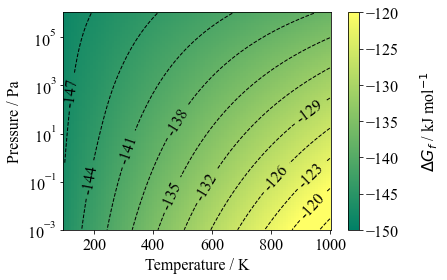

In [30]:
S8_binary_reaction = reactions.Reaction({BaS:8,ZrS:8,S8:1},{BaZrS3:8},
                                       temperature=T, pressure=P,fu=8)
GFE = S8_binary_reaction.Dmu(units="kJ")
GFE.plot_TvsP(scale_range=[-150, -120])

These results are consistent with the findings for decomposition into S8 and
 elemental phases. Similar behaviour to S2 but with lesser sensitivity to
 the T,P conditions.

# ZrS (Fm-3m) <-> ZrS (P4nmm)

In [31]:
ZrS_P4nmm = materials.Solid("ZrS",{"Zr": 1,"S": 1}, "."
                                               ""
                                              "./BaZrS3/phonopy_output/ZrS_P4_nmm.dat",
                      calculation=ZrS_calc)
ZrS_Fm3m_calc = calculations.Calculation(volume=0.344611E+02, energy=-109591.347151412,
                                         xc="pbesol",NAtoms=2)
ZrS_Fm3m = materials.Solid("ZrS",{"Zr": 1,"S": 1}, "."
                                               ""
                                              "./BaZrS3/phonopy_output/ZrS_Fm-3m.dat",
                      calculation=ZrS_Fm3m_calc)

In [32]:
ZrS_reaction = reactions.Reaction({ZrS_Fm3m:1},{ZrS_P4nmm:1},
                                       temperature=T, pressure=P,fu=1)

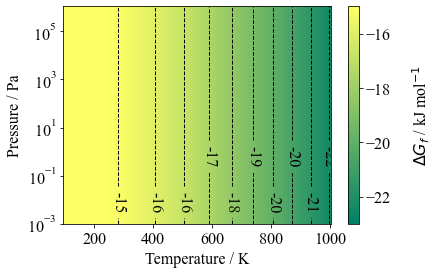

In [33]:
GFE = ZrS_reaction.Dmu(units="kJ")
GFE.plot_TvsP(scale_range=[-23, -15])

At all temperatures the ZrS_P4nmm polymorph is more stable.

# Ba3Zr2S7 + ZrS2 <-> 3BaZrS3

In [34]:
Ba3Zr2S7_calc = calculations.Calculation(volume=0.124269E+04, energy=-3794761.060664689,
                                         xc="pbesol",NAtoms=48)
Ba3Zr2S7 = materials.Solid("Ba3Zr2S7",{"Ba": 3,"Zr": 2,"S":7},
                           "../BaZrS3/phonopy_output/Ba3Zr2S7_P4_2_mnm.dat",
                           calculation=Ba3Zr2S7_calc)

In [35]:
ternary_reaction = reactions.Reaction({Ba3Zr2S7:1,ZrS2:1},{BaZrS3:3},
                                      temperature=T, pressure=P, fu=3)

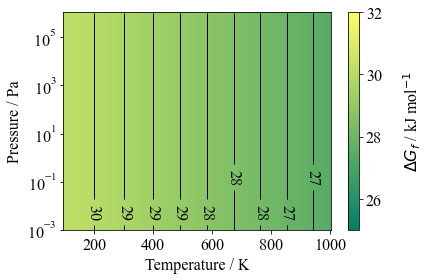

In [36]:
GFE = ternary_reaction.Dmu(units="kJ")
GFE.plot_TvsP(scale_range=[25, 32])

# 3BaZrS3 <->  Ba3Zr2S7 + ZrS2

In [37]:
ternary_reaction = reactions.Reaction({BaZrS3:3},{Ba3Zr2S7:1,ZrS2:1},fu=3)
ternary_reaction.Dmu(units="eV").potential

-0.30795514583587646

In [38]:
ternary_reaction = reactions.Reaction({BaZrS3:1},{Ba3Zr2S7:1/3,ZrS2:1/3},fu=1)
ternary_reaction.Dmu(units="eV").potential

-0.30795514571946114

In [39]:
ternary_reaction = reactions.Reaction({BaZrS3:1},{Ba3Zr2S7:1/3,ZrS2:1/3},
                                      fu=1,temperature=0,pressure=0)
ternary_reaction.DH(units="eV").potential

-0.313067136448808

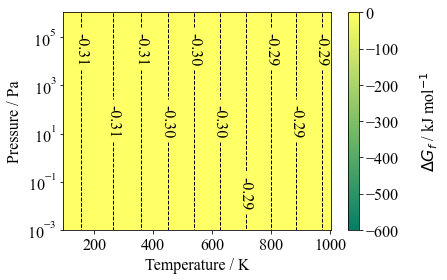

In [110]:
ternary_reaction = reactions.Reaction({BaZrS3:1},{Ba3Zr2S7:1/3,ZrS2:1/3},
                                      fu=1,temperature=T,pressure=P).Dmu(units="eV")
ternary_reaction.plot_TvsP(precision="%.2f")

Quite unexpected results!

Degradation into the RP phase isn't reported however it is expected that
there would be significant kinetic barriers for forming this phase.

The results are somewhat in line with what Scragg et al report (https://pubs
.acs.org/doi/10.1021/acsaem.2c00704) - that BaZrS3 crystallisation from
sulphur-containing precursors (Ba-Zr-S) is not possible, whilst xtalisation
is possible from Ba-Zr precursors.

# Ba3Zr2S7  <-> 3BaS + 2ZrS +S2


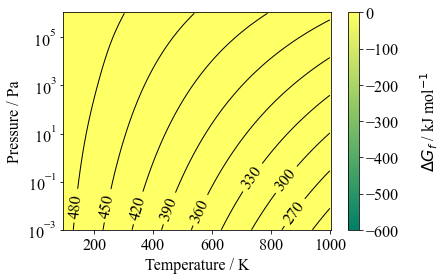

In [40]:
ternary_gas_reaction = reactions.Reaction({Ba3Zr2S7:1},{BaS:3,ZrS:2,S2:1},
                                      temperature=T, pressure=P, fu=1)
GFE = ternary_gas_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

# BaS + S2 <-> BaS3

In [41]:
BaS3_calc = calculations.Calculation(volume=0.188541E+03,energy=-515300.801230511, xc="pbesol",NAtoms=8)
BaS3 = materials.Solid("BaS3",{"Ba": 1,"S":3},
                           "../BaZrS3/phonopy_output/BaS3_P-42_1m.dat",
                           calculation=BaS3_calc)

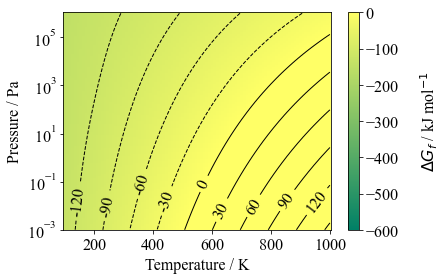

In [42]:

T = np.linspace(100, 1000, 100)  # K
P = np.array(np.logspace(-3, 6, 100), ndmin=2).transpose()  # Pa
Ba_S_reaction = reactions.Reaction({BaS:1,S2:1},{BaS3:1},temperature=T,
                                   pressure=P)
GFE = Ba_S_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

# 4BaS + S8 <-> 4BaS3

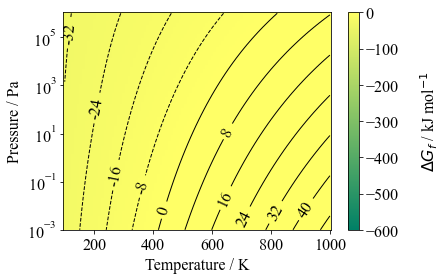

In [43]:
Ba_S_reaction = reactions.Reaction({BaS:4,S8:1},{BaS3:4},temperature=T,
                                   pressure=P,fu=4)
GFE = Ba_S_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

Ok, so this is interesting! BaS3 is formed below ~700K. Above
this value it is not energetically favourable to form BaS3.

Another thing to note is that BaS3 has a melting point of 554 °C.

As we increase the partial pressure of sulphur the formation of BaS3 becomes
more favourable.

# 2Ba + 3S2 <-> 2BaS3



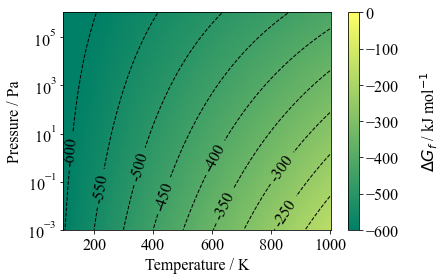

In [44]:
Ba_S_reaction = reactions.Reaction({Ba: 2, S2: 3}, {BaS3: 2}, temperature=T,
                                   pressure=P,fu=2)
GFE = Ba_S_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

# 8Ba + 3S8 <-> 8BaS3

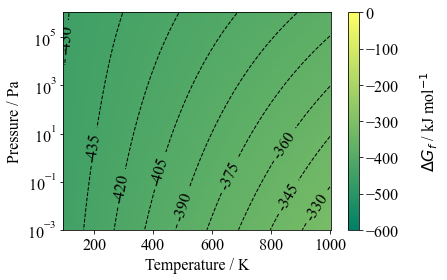

In [45]:
Ba_S_reaction = reactions.Reaction({Ba: 8, S8: 3}, {BaS3: 8}, temperature=T,
                                   pressure=P,fu=8)
GFE = Ba_S_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

# Competing phases for the Ba-S system

Using S8 for comparison with Scragg results

8Ba + 3S8 could form:
- 8BaS + 2S8
- 8BaS2 + S8
- 8BaS3

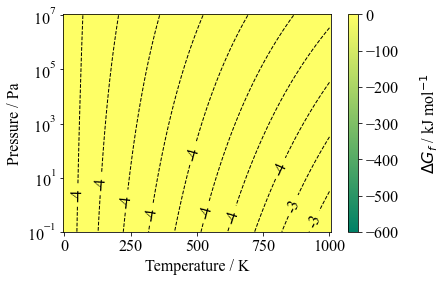

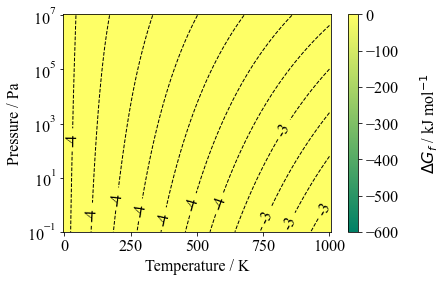

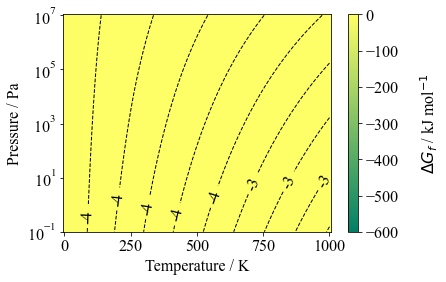

In [46]:
T = np.linspace(0, 1000, 100)  # K
P = np.array(np.logspace(-1, 7, 100), ndmin=2).transpose()  # Pa

BaS_reaction = reactions.Reaction({Ba:8,S8:3},{BaS:8,S8:2},temperature=T,pressure=P,fu=8)
BaS2_reaction = reactions.Reaction({Ba:8,S8:3},{BaS2:8,S8:1},temperature=T,pressure=P,fu=8)
BaS3_reaction = reactions.Reaction({Ba:8,S8:3},{BaS3:8},temperature=T,pressure=P,fu=8)

BaS_reaction.Dmu().plot_TvsP()
BaS2_reaction.Dmu().plot_TvsP()
BaS3_reaction.Dmu().plot_TvsP()




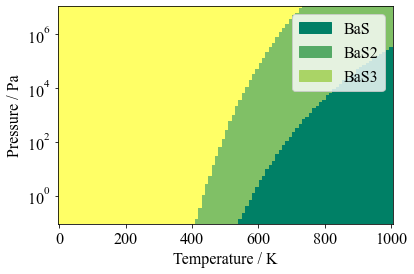

In [47]:
BaS_system = potentials.Potentials(BaS_reaction.Dmu().potential,BaS2_reaction.Dmu().potential,BaS3_reaction.Dmu().potential)
BaS_system.plot_TvsP(T=T,P=P,material_labels=["BaS","BaS2","BaS3"],T_units="K")

In [48]:
print(BaS_reaction.Dmu(T=823,P=5).potential)   # these are the temps and pressures scragg et al
print(BaS2_reaction.Dmu(T=823,P=5).potential)
print(BaS3_reaction.Dmu(T=823,P=5).potential)

print((BaS_reaction.Dmu(T=823,P=5).potential-BaS3_reaction.Dmu(T=823,P=5).potential)/4)


-3.9833944212587085
-3.9183130761084612
-3.7662326603312977
-0.0542904402318527


ok, so BaS3 reaction in this regime move into the 50meV/atom range where synthesis possible. There are actually very close energy differences between BaS, BaS2 and BaS3.

In [49]:
print(BaS_reaction.Dmu(T=773,P=1000).potential)   # these are the temps and pressures significant in Wang et al.
print(BaS2_reaction.Dmu(T=773,P=1000).potential)
print(BaS3_reaction.Dmu(T=773,P=1000).potential)

print((BaS_reaction.Dmu(T=723,P=1000).potential-BaS3_reaction.Dmu(T=773,P=1000).potential) / 4)
print((BaS_reaction.Dmu(T=773,P=1000).potential-BaS3_reaction.Dmu(T=773,P=1000).potential) / 4)
print((BaS_reaction.Dmu(T=823,P=1000).potential-BaS3_reaction.Dmu(T=773,P=1000).potential) / 4)


-4.049766415497288
-4.044217825459782
-3.9565442211169284
-0.028176571657240856
-0.02330554859508993
-0.018455053977959324


This is bridging that 25meV/atom range where accessible

# Competing phases for the Zr-S system

Using S8 for comparison with Scragg results:

8Zr + 3S8 could form:
- 8ZrS + 2S8
- 8ZrS2 + S8
- 8ZrS3

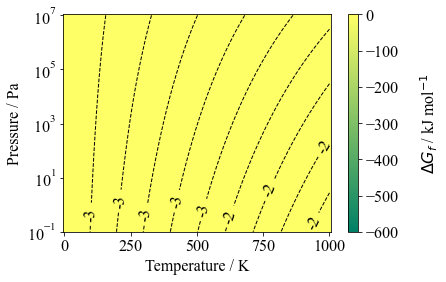

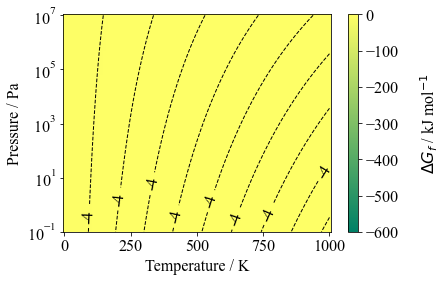

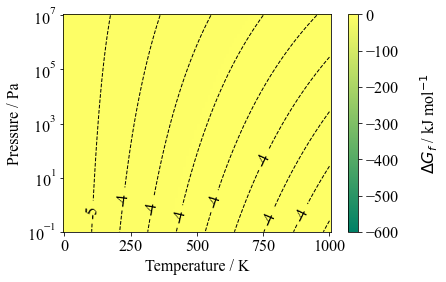

In [50]:
ZrS3_calc = calculations.Calculation(volume=0.164584E+03,
                                     energy=-262633.853463458, xc="pbesol",
                                     NAtoms=8)
ZrS3 = materials.Solid("ZrS3", {"Zr": 1, "S": 3},
                       "../BaZrS3/phonopy_output/ZrS3_P2_1m.dat",
                       calculation=ZrS3_calc)

ZrS_reaction = reactions.Reaction({Zr:8,S8:3},{ZrS:8,S8:2},temperature=T,pressure=P,fu=8)
ZrS2_reaction = reactions.Reaction({Zr:8,S8:3},{ZrS2:8,S8:1},temperature=T,pressure=P,fu=8)
ZrS3_reaction = reactions.Reaction({Zr:8,S8:3},{ZrS3:8},temperature=T,pressure=P,fu=8)

ZrS_reaction.Dmu().plot_TvsP()
ZrS2_reaction.Dmu().plot_TvsP()
ZrS3_reaction.Dmu().plot_TvsP()


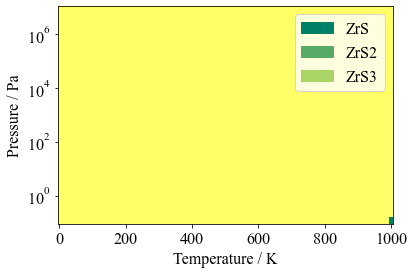

In [51]:
ZrS_system = potentials.Potentials(ZrS_reaction.Dmu().potential,ZrS2_reaction.Dmu().potential,ZrS3_reaction.Dmu().potential)
ZrS_system.plot_TvsP(T=T,P=P,material_labels=["ZrS","ZrS2","ZrS3"],T_units="K")

In [52]:
print(ZrS_reaction.Dmu(T=823,P=5).potential)   # these are the temps and pressures scragg et al
print(ZrS2_reaction.Dmu(T=823,P=5).potential)
print(ZrS3_reaction.Dmu(T=823,P=5).potential)

print((ZrS2_reaction.Dmu(T=823,P=5).potential-ZrS3_reaction.Dmu(T=823,P=5).potential)/4)


-2.882132624887163
-4.098310913395835
-4.209748310095165
0.02785934917483246


# ZrS + S2 <-> ZrS3

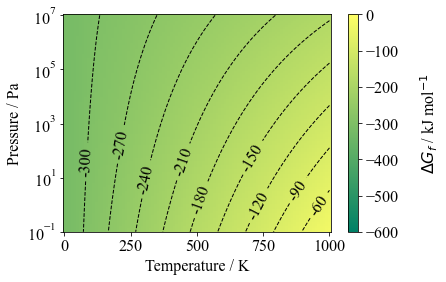

In [53]:
ZrS3_calc = calculations.Calculation(volume=0.164584E+03,
                                     energy=-262633.853463458, xc="pbesol",
                                     NAtoms=8)
ZrS3 = materials.Solid("ZrS3", {"Zr": 1, "S": 3},
                       "../BaZrS3/phonopy_output/ZrS3_P2_1m.dat",
                       calculation=ZrS3_calc)
Zr_S_reaction = reactions.Reaction({ZrS: 1, S2: 1}, {ZrS3: 1}, temperature=T,
                                   pressure=P)
GFE = Zr_S_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

# 8ZrS +2S8 <-> 8ZrS3

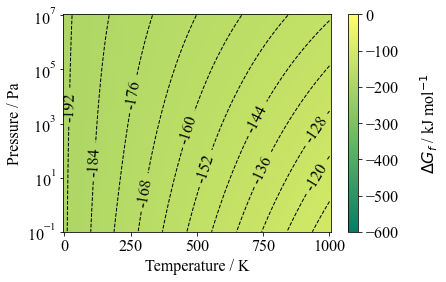

In [54]:


Zr_S_reaction = reactions.Reaction({ZrS: 8, S8: 2}, {ZrS3: 8}, temperature=T,
                                   pressure=P,fu=8)
GFE = Zr_S_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

# 2ZrS + S2 <-> 2ZrS2

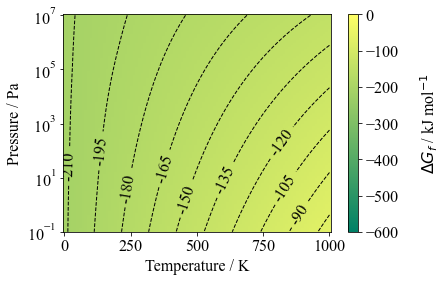

In [55]:
Zr_S_reaction = reactions.Reaction({ZrS: 2, S2: 1}, {ZrS2: 2}, temperature=T,
                                   pressure=P,fu=2)
GFE = Zr_S_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

# 2Zr +  3S2 <-> 2ZrS3

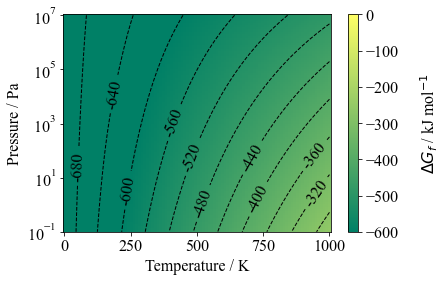

In [56]:
Zr_S_reaction = reactions.Reaction({Zr: 2, S2: 3}, {ZrS3: 2}, temperature=T,
                                   pressure=P,fu=2)
GFE = Zr_S_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

# Zr + S2 <-> ZrS2

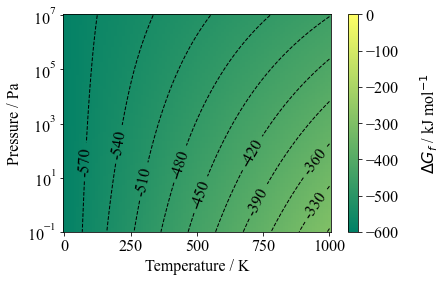

In [57]:
Zr_S_reaction = reactions.Reaction({Zr: 1, S2: 1}, {ZrS2: 1}, temperature=T,
                                   pressure=P,fu=1)
GFE = Zr_S_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

# 2ZrS2 + S2 <-> 2ZrS3

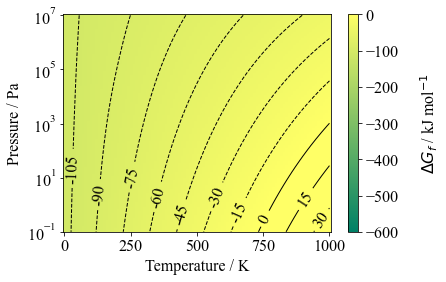

In [58]:
Zr_S_reaction = reactions.Reaction({ZrS2: 2, S2: 1}, {ZrS3: 2}, temperature=T,
                                   pressure=P,fu=2)
GFE = Zr_S_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

# BaS3 + ZrS2  <->  BaZrS3 +  S2

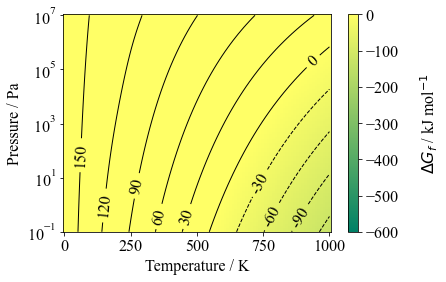

In [59]:
BaZrS3_S2_reaction = reactions.Reaction( {BaS3: 1, ZrS2:1},{BaZrS3: 1, S2: 1},
                                       temperature=T,
                                   pressure=P,fu=1)
GFE = BaZrS3_S2_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

# 4BaS3 + 4ZrS2 <-> 4BaZrS3 + S8

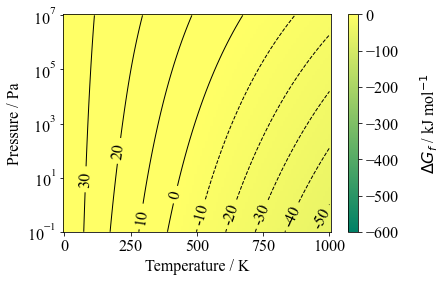

In [60]:
BaZrS3_S8_reaction = reactions.Reaction( {BaS3: 4, ZrS2:4},{BaZrS3: 4, S8: 1},
                                       temperature=T,
                                   pressure=P,fu=4)
GFE = BaZrS3_S8_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

Ok, so this looks promising for comparison with experimental results...

# Experimental results

- BaS and Zr targets were used to deposit amorphous Ba–Zr–S films by reactive
 co-sputtering in the presence of H2S. These precursors were then annealed in an inert atmosphere for crystallization. The optimal temperature to form BaZrS3 was found to be around 900 °C.

- A related case is the work by Yu et al, (31) who fabricated Ba–Zr–S layers by pulsed laser deposition (PLD). Interestingly, even with a substrate temperature as high as 700 °C in the PLD step, the as-deposited films turned out amorphous and highly sulfur-deficient.

- Wang et al. succeeded in synthesizing BaZrS3 at temperatures as low as 500
°C by solid-state reaction. They demonstrated that an overstoichiometric
quantity of S played crucial role in formation─specifically, a certain,
small S excess was required for smooth phase formation at a lower
temperature.  The addition of too little S led solely to the formation of
the binary compounds BaS, BaS2, and ZrS2, while a too large S excess
produced mainly BaS3 and ZrS3.

-  Scragg et al: In qualitative agreement with Wang et al. for a very
different type of process, (36) the behavior seen in Figure 2a confirms that a certain, defined S excess is required for smooth phase formation at moderate temperatures when starting from elemental precursors.

This previous point in conjunction with our results seems to suggest that we
 do not want BaS3 formation.

# BaS + ZrS2 <-> BaZrS3

These are the binaries typically used as Ba is formally a +2 cation and Zr
is formally a 4+ cation.

In [61]:
BaS_calc = calculations.Calculation(volume=0.632552E+02,energy=-235926.586148547, xc='pbesol',NAtoms=2)
ZrS2_calc = calculations.Calculation(volume=0.667493E+02,energy=-120454.748375135,xc='pbesol',NAtoms=3)
BaS = materials.Solid("BaS",{"Ba": 1, "S": 1},"../BaZrS3/phonopy_output/BaS_Fm-3m.dat",calculation=BaS_calc)
ZrS2 = materials.Solid("ZrS2",{"Zr": 1,"S": 2}, "../BaZrS3/phonopy_output/ZrS2_P-3m1.dat",calculation=ZrS2_calc)

In [62]:
bulk_reaction = reactions.Reaction({BaS:1,ZrS2:1},{BaZrS3:1},temperature=0,pressure=0)
bulk_reaction.DH(units="eV").potential

-0.024347924685571343

The perovskite is not as stable against decomposition into binary phases as
expected. Previously reported energies are in the range -450 to -200 meV per fu (https://onlinelibrary.wiley.com/doi/full/10.1002/adom.202101704).

To move our calculated number closer to those previously reported we need to
either: i) reduce (make more negative) the energy of BaZrS3 or ii) increase
(make less negative) the energy of the binary reactants.

The value we have calculated above has been verified by hand. If we do not
include U_func (from the phonon calculation at T=0) then the calculated energy increases to -16.96meV.



In [63]:
(-1425525.405951922/4)-(-235926.586148547+-120454.748375135)

-0.016964298498351127

Let's compare the calculated DFT energies to those on the materials project.

The uncorrected DFT energy for BaZrS3 (20 atoms) is -127.5651 eV. For BaS it is -10.2125 eV (2 atoms). For ZrS2 it is
-21.3614 eV (3 atoms). If we calculate the change in energy:

In [64]:
-10.2125 + -21.3614 - (-127.5651/4)

0.3173749999999984

Ok, so that is 317 meV which is the same as that reported in the Scragg
review.

Furthermore, we can see that the energetics for the BaS and ZrS2 for our
study do not look quite correct. MP has BaS = -10.2125, ZrS2 = -21.3614. We
have BaS = -235926.586148547 (2 atoms), ZrS2 = -120454.748375135 (3 atoms),
BaZrS3 = -1425525.405951922 (20 atoms).

MP BaS: -2.410 eV, ZrS2: -1.956 eV/atom
OQMD: BaS: -2.225 eV/atom, ZrS2: -1.709 eV/atom, BaZrS3: -1.982 eV/atom


In [65]:
-1.982*5 - (-1.709*3+-2.225*2)

-0.3329999999999984

One difference to consider might be the DFT code used. Huo (520eV cutoff) and
Meng (400eV cutoff) use VASP, filippone doesn't say what they use (!),
Materials Project (520eV
cutoff) and OQMD (520eV) use VASP.

We can also get energies from the NOMAD database:

BaS: -235926.086754954 eV (https://nomad-lab
.eu/prod/v1/gui/search/entries/entry/id/p8nVstufTHGfaR4r0DQ9fQ/zN_LvlZMqDuLDXIxz6JProkWUk6w/raw)

ZrS2: -120454.548076675 eV (https://nomad-lab.eu/prod/v1/gui/search/entries/entry/id/CLCkTK2dQuuL1G1IReJSZw/kRN3qUtYxBVvYQAQ1gCbQFUJlkAG/raw)

Theres no FHI-aims calculation for BaZrS3.

Let's try and use these values in our calculation:

In [66]:
(-1425525.405951922/4)-(-235926.086754954+-120454.548076675)

-0.7166563515202142

Ok, so now the perovskite is more stable **however** we can't really trust
this number as  we don't know what the perovskite total energy would be
using their method. Let's instead compare the ratio of the BaS and ZrS2.

In [67]:
# BaS/ZrS2
-235926.086754954 / -120454.548076675

1.9586316209893206

In [68]:
-235926.586148547 / -120454.748375135

1.9586325099762394

They are both almost exactly the same! So this is weird. Why is this the
ratio using FHI-aims, whilst for VASP (Materials project) it is:

In [69]:
# BaS / ZrS2 (MP)
-10.2125/-21.3614

0.4780819609201644

In [70]:
# OQMD
(-5.106*2) / (-7.114*3)

0.47849311217317964

It could  be linked to the cutoffs used in the plane wave calculations. For
layered compounds (like the ZrS2) the cutoff may be quite high: https://www
.ncbi.nlm.nih.gov/pmc/articles/PMC5507937/.

The Jarvis database has carefully converged calculations for layered
materials. for convergenve to 0.001eV a 600eV plane wave cutoff was required
 (https://www.ctcms.nist.gov/~knc6/static/JARVIS-DFT/JVASP-82.xml).

The other option is that it is linked to the volume of the material.

OQMD: ZrS2: 23.626 / atom, BaS: 33.483
MP: ZrS2: 25.999 / atom, BaS: 33.655
Our calcs: ZrS2: 22.24977 / atom, BaS: 31.6276
NoMAD: ZrS2: 22.5044 / BaS: 32.09555

It's worth noting  that the NoMAD relaxation used the MP structure as a
starting point.

Other comparisons could include the k-point grid used: 10 10 10 from OQMD,

All calculations using pbesol.

It may be worth looking at the settings discussed in this document:
https://th.fhi-berlin.mpg.de/th/Meetings/DFT-workshop-Berlin2011/presentations/2011-07-14_tutorial2_handout.pdf.

We could compare to experimental formation energies:

BaS : -2.436 eV/atom (from OQMD experimental entry)
-2.225 eV/atom (from OQMD calculated entry)

From our calculation:

In [71]:
(-235926.586148547- (-225060.517335015+ -0.347575504588933e06/32)) / 2

-2.1671475639304845

We expect there to be some discrepancy due to finite temperature
effects  (entropy and  volume dependence) and inexact
exchange-correlation functions. Our value is not  as close to the
experimental value. However  if our  value moved more negative (towards the
experimental value) then the perovskite would become even more unstable...

ZrS2:  -1.993 eV/atom (from the OQMD experimental entry)
 -1.709 eV/atom (from the OQMD calculated entry)

From our calculation:


In [72]:
(-120454.748375135-(-197453.101608662/2+(-0.347575504588933e06/16)))/3

-1.5761779985623434

BaZrS3: -1.982 eV/atom (OQMD calculated energy)

In [73]:
(-1425525.405951922/4-(-197453.101608662/2+-225060.517335015+-0.347575504588933e06/32+-0.347575504588933e06/16)) / 5

-1.8159586844150908

In [74]:
# OQMD stability - our calculated stability
d1=-2.225--2.1671475639304845    #  BaS
d2=-1.709--1.5761779985623434    #  ZrS2
d3=-1.982--1.8159586844150908    # BaZrS3

In [75]:
print(d1,d2,d3)

-0.05785243606951562 -0.13282200143765666 -0.1660413155849092


There seems to be a consistent underestimation of the stability of the
compounds. I'd expect there to be some cancellation on either side of the
equation but  this is not the case, suggesting that there are errors in  the
 reference point (elemental compounds) used.



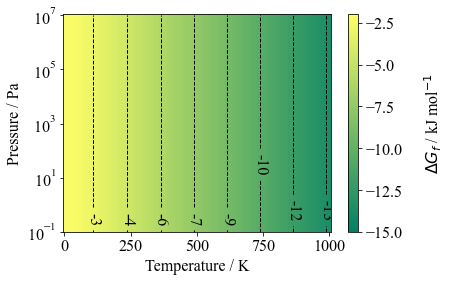

In [76]:
bulk_reaction = reactions.Reaction({BaS:1,ZrS2:1},{BaZrS3:1},temperature=T,
                                   pressure=P)
GFE = bulk_reaction.Dmu(units="kJ")
GFE.plot_TvsP(scale_range=[-15, -2])

The thing to note here is that chemical accuracy is around 4kJ/mol. So this
is telling us that around room temperature the

# BaS2 + ZrS <-> BaZrS3

Note that we are using the more stable of the ZrS compounds

In [77]:
BaS2_calc = calculations.Calculation(volume=0.168953E+03,energy=-493576.992662581, xc='pbesol',NAtoms=6)
ZrS_calc = calculations.Calculation(volume=0.691428E+02,energy=-219183.017830408,xc='pbesol',NAtoms=4)
BaS2 = materials.Solid("BaS2",{"Ba": 1, "S": 2},"."
                                               ""
                                               "./BaZrS3/phonopy_output/BaS2_C2_c.dat",calculation=BaS2_calc)
ZrS = materials.Solid("ZrS",{"Zr": 1,"S": 1}, "."
                                               ""
                                              "./BaZrS3/phonopy_output/ZrS_P4_nmm.dat",
                      calculation=ZrS_calc)

In [78]:
bulk_reaction = reactions.Reaction({BaS2:1,ZrS:1},{BaZrS3:1},temperature=0,
                                   pressure=0)
bulk_reaction.DH(units="eV").potential

-1.3552561679389328

This number has been verified by hand as 1.34624179604
(not taking into account any phonon contributions).

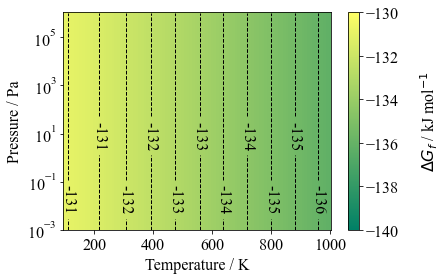

In [79]:
T = np.linspace(100,1000,100) # K
P = np.array( np.logspace(-3,6,100),ndmin=2).transpose() # Pa
bulk_reaction = reactions.Reaction({BaS2:1,ZrS:1},{BaZrS3:1},temperature=T, pressure=P)
GFE = bulk_reaction.Dmu(units="kJ")
GFE.plot_TvsP(scale_range=[-140, -130])

The interesting thing here is that the material becomes more stable as the
temperature increases. This is opposite to the trends seen so far - can it
be reasoned using arguments from thermodynamics?

Some discussion on whether entropy can stabilise reactants more than
products here: https://iopscience.iop.org/article/10.1088/1361-6463/aae1ee/meta

# 2BaS + 2ZrS + S2 <-> 2BaZrS3


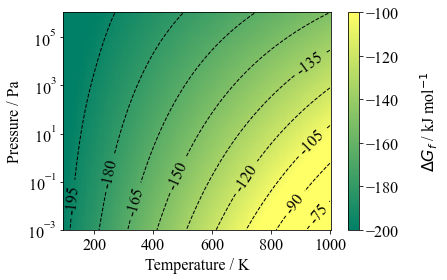

In [80]:
S2_binary_reaction = reactions.Reaction({BaS:2,ZrS:2,S2:1},{BaZrS3:2},
                                       temperature=T, pressure=P,fu=2)
GFE = S2_binary_reaction.Dmu(units="kJ")
GFE.plot_TvsP(scale_range=[-200, -100])

This is getting interesting now, as we are approaching a high temperature
regime where the perovskite might become unstable. Note that at high-T
sulphur gas is more likely found in the S2 allotrope (so at high T this
gives a better picture of the energetics when compared to S8).

# 8BaS + 8ZrS + S8 <-> 8BaZrS3

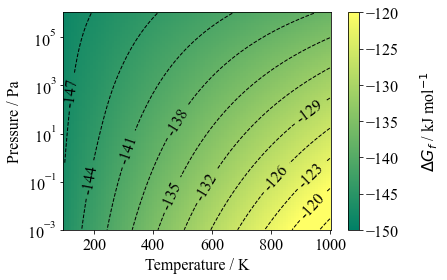

In [81]:
S8_binary_reaction = reactions.Reaction({BaS:8,ZrS:8,S8:1},{BaZrS3:8},
                                       temperature=T, pressure=P,fu=8)
GFE = S8_binary_reaction.Dmu(units="kJ")
GFE.plot_TvsP(scale_range=[-150, -120])

These results are consistent with the findings for decomposition into S8 and
 elemental phases. Similar behaviour to S2 but with lesser sensitivity to
 the T,P conditions.

# ZrS (Fm-3m) <-> ZrS (P4nmm)

In [82]:
ZrS_P4nmm = materials.Solid("ZrS",{"Zr": 1,"S": 1}, "."
                                               ""
                                              "./BaZrS3/phonopy_output/ZrS_P4_nmm.dat",
                      calculation=ZrS_calc)
ZrS_Fm3m_calc = calculations.Calculation(volume=0.344611E+02, energy=-109591.347151412,
                                         xc="pbesol",NAtoms=2)
ZrS_Fm3m = materials.Solid("ZrS",{"Zr": 1,"S": 1}, "."
                                               ""
                                              "./BaZrS3/phonopy_output/ZrS_Fm-3m.dat",
                      calculation=ZrS_Fm3m_calc)

In [83]:
ZrS_reaction = reactions.Reaction({ZrS_Fm3m:1},{ZrS_P4nmm:1},
                                       temperature=T, pressure=P,fu=1)

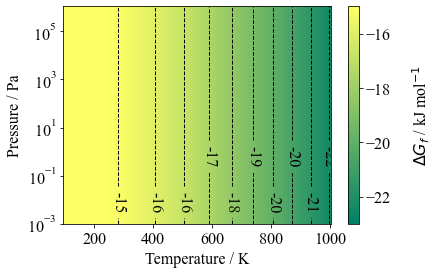

In [84]:
GFE = ZrS_reaction.Dmu(units="kJ")
GFE.plot_TvsP(scale_range=[-23, -15])

At all temperatures the ZrS_P4nmm polymorph is more stable.

# Ba3Zr2S7 + ZrS2 <-> 3BaZrS3

In [85]:
Ba3Zr2S7_calc = calculations.Calculation(volume=0.124269E+04, energy=-3794761.060664689,
                                         xc="pbesol",NAtoms=48)
Ba3Zr2S7 = materials.Solid("Ba3Zr2S7",{"Ba": 3,"Zr": 2,"S":7},
                           "../BaZrS3/phonopy_output/Ba3Zr2S7_P4_2_mnm.dat",
                           calculation=Ba3Zr2S7_calc)

In [86]:
ternary_reaction = reactions.Reaction({Ba3Zr2S7:1,ZrS2:1},{BaZrS3:3},
                                      temperature=T, pressure=P, fu=3)

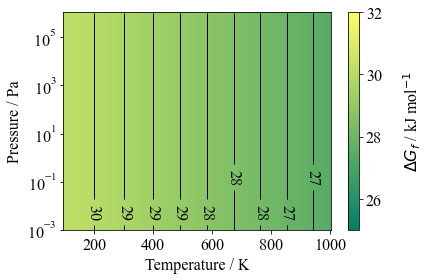

In [87]:
GFE = ternary_reaction.Dmu(units="kJ")
GFE.plot_TvsP(scale_range=[25, 32])

# 3BaZrS3 <->  Ba3Zr2S7 + ZrS2

In [88]:
ternary_reaction = reactions.Reaction({BaZrS3:3},{Ba3Zr2S7:1,ZrS2:1},fu=3)
ternary_reaction.Dmu(units="eV").potential

-0.30795514583587646

In [89]:
ternary_reaction = reactions.Reaction({BaZrS3:1},{Ba3Zr2S7:1/3,ZrS2:1/3},fu=1)
ternary_reaction.Dmu(units="eV").potential

-0.30795514571946114

In [90]:
ternary_reaction = reactions.Reaction({BaZrS3:1},{Ba3Zr2S7:1/3,ZrS2:1/3},
                                      fu=1,temperature=0,pressure=0)
ternary_reaction.DH(units="eV").potential

-0.313067136448808

Quite unexpected results!

Degradation into the RP phase isn't reported however it is expected that
there would be significant kinetic barriers for forming this phase.

The results are somewhat in line with what Scragg et al report (https://pubs
.acs.org/doi/10.1021/acsaem.2c00704) - that BaZrS3 crystallisation from
sulphur-containing precursors (Ba-Zr-S) is not possible, whilst xtalisation
is possible from Ba-Zr precursors.

# Ba3Zr2S7  <-> 3BaS + 2ZrS +S2


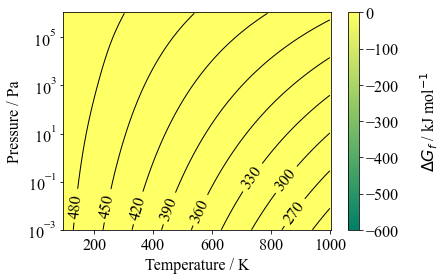

In [91]:
ternary_gas_reaction = reactions.Reaction({Ba3Zr2S7:1},{BaS:3,ZrS:2,S2:1},
                                      temperature=T, pressure=P, fu=1)
GFE = ternary_gas_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

# BaS + S2 <-> BaS3

In [92]:
BaS3_calc = calculations.Calculation(volume=0.188541E+03,energy=-515300.801230511, xc="pbesol",NAtoms=8)
BaS3 = materials.Solid("BaS3",{"Ba": 1,"S":3},
                           "../BaZrS3/phonopy_output/BaS3_P-42_1m.dat",
                           calculation=BaS3_calc)

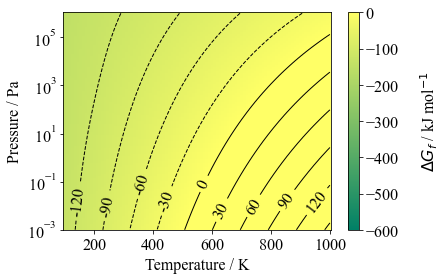

In [93]:

T = np.linspace(100, 1000, 100)  # K
P = np.array(np.logspace(-3, 6, 100), ndmin=2).transpose()  # Pa
Ba_S_reaction = reactions.Reaction({BaS:1,S2:1},{BaS3:1},temperature=T,
                                   pressure=P)
GFE = Ba_S_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

# 4BaS + S8 <-> 4BaS3

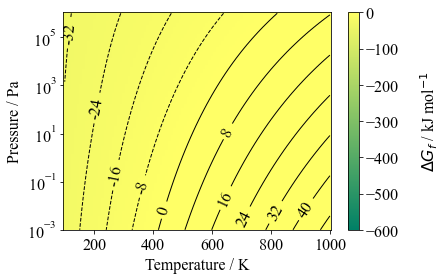

In [94]:
Ba_S_reaction = reactions.Reaction({BaS:4,S8:1},{BaS3:4},temperature=T,
                                   pressure=P,fu=4)
GFE = Ba_S_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

Ok, so this is interesting! BaS3 is formed below ~700K. Above
this value it is not energetically favourable to form BaS3.

Another thing to note is that BaS3 has a melting point of 554 °C.

As we increase the partial pressure of sulphur the formation of BaS3 becomes
more favourable.

# 2Ba + 3S2 <-> 2BaS3



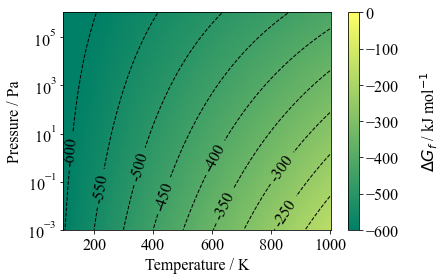

In [95]:
Ba_S_reaction = reactions.Reaction({Ba: 2, S2: 3}, {BaS3: 2}, temperature=T,
                                   pressure=P,fu=2)
GFE = Ba_S_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

# 8Ba + 3S8 <-> 8BaS3

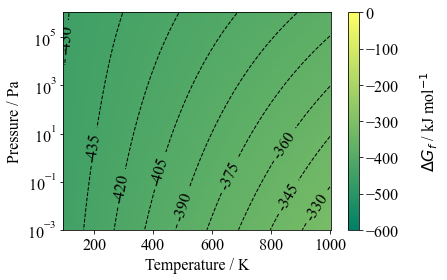

In [96]:
Ba_S_reaction = reactions.Reaction({Ba: 8, S8: 3}, {BaS3: 8}, temperature=T,
                                   pressure=P,fu=8)
GFE = Ba_S_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

# ZrS + S2 <-> ZrS3

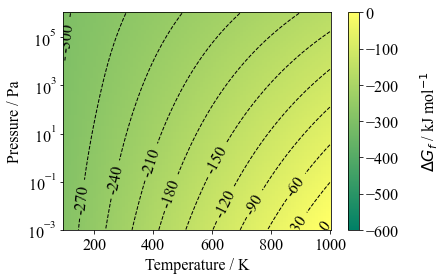

In [97]:
ZrS3_calc = calculations.Calculation(volume=0.164584E+03,
                                     energy=-262633.853463458, xc="pbesol",
                                     NAtoms=8)
ZrS3 = materials.Solid("ZrS3", {"Zr": 1, "S": 3},
                       "../BaZrS3/phonopy_output/ZrS3_P2_1m.dat",
                       calculation=ZrS3_calc)
Zr_S_reaction = reactions.Reaction({ZrS: 1, S2: 1}, {ZrS3: 1}, temperature=T,
                                   pressure=P)
GFE = Zr_S_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

# 8ZrS +2S8 <-> 8ZrS3

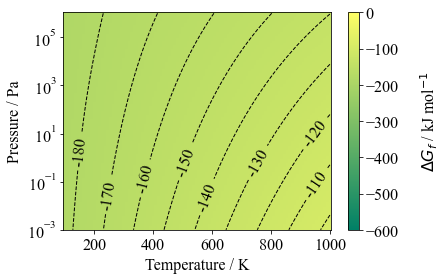

In [98]:


Zr_S_reaction = reactions.Reaction({ZrS: 8, S8: 2}, {ZrS3: 8}, temperature=T,
                                   pressure=P,fu=8)
GFE = Zr_S_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

# 2ZrS + S2 <-> 2ZrS2

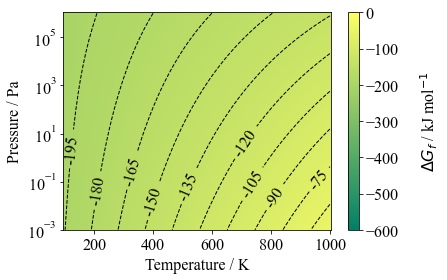

In [99]:
Zr_S_reaction = reactions.Reaction({ZrS: 2, S2: 1}, {ZrS2: 2}, temperature=T,
                                   pressure=P,fu=2)
GFE = Zr_S_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

# 2Zr +  3S2 <-> 2ZrS3

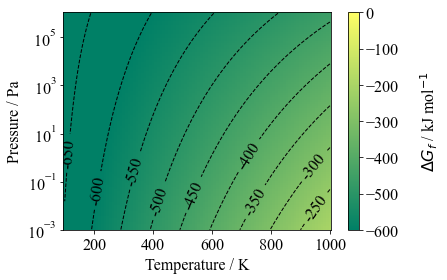

In [100]:
Zr_S_reaction = reactions.Reaction({Zr: 2, S2: 3}, {ZrS3: 2}, temperature=T,
                                   pressure=P,fu=2)
GFE = Zr_S_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

# Zr + S2 <-> ZrS2

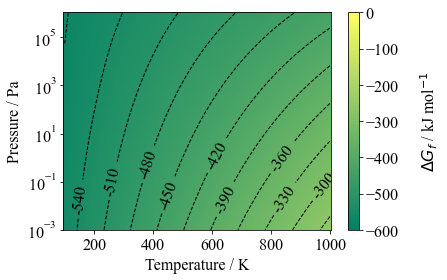

In [101]:
Zr_S_reaction = reactions.Reaction({Zr: 1, S2: 1}, {ZrS2: 1}, temperature=T,
                                   pressure=P,fu=1)
GFE = Zr_S_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

# 2ZrS2 + S2 <-> 2ZrS3

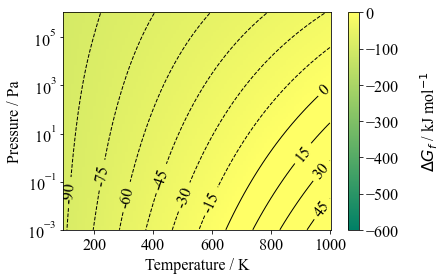

In [102]:
Zr_S_reaction = reactions.Reaction({ZrS2: 2, S2: 1}, {ZrS3: 2}, temperature=T,
                                   pressure=P,fu=2)
GFE = Zr_S_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

# BaS3 + ZrS2  <->  BaZrS3 +  S2

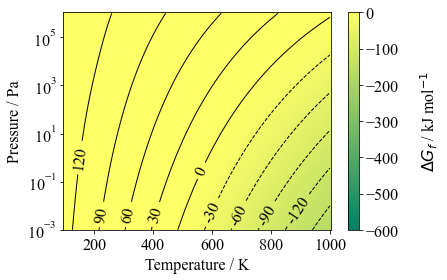

In [103]:
BaZrS3_S2_reaction = reactions.Reaction( {BaS3: 1, ZrS2:1},{BaZrS3: 1, S2: 1},
                                       temperature=T,
                                   pressure=P,fu=1)
GFE = BaZrS3_S2_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

# 4BaS3 + 4ZrS2 <-> 4BaZrS3 + S8

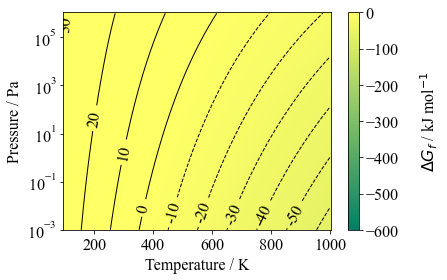

In [104]:
BaZrS3_S8_reaction = reactions.Reaction( {BaS3: 4, ZrS2:4},{BaZrS3: 4, S8: 1},
                                       temperature=T,
                                   pressure=P,fu=4)
GFE = BaZrS3_S8_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

Ok, so this looks promising for comparison with experimental results...

# Experimental results

- BaS and Zr targets were used to deposit amorphous Ba–Zr–S films by reactive
 co-sputtering in the presence of H2S. These precursors were then annealed in an inert atmosphere for crystallization. The optimal temperature to form BaZrS3 was found to be around 900 °C.

- A related case is the work by Yu et al, (31) who fabricated Ba–Zr–S layers by pulsed laser deposition (PLD). Interestingly, even with a substrate temperature as high as 700 °C in the PLD step, the as-deposited films turned out amorphous and highly sulfur-deficient.

- Wang et al. succeeded in synthesizing BaZrS3 at temperatures as low as 500
°C by solid-state reaction. They demonstrated that an overstoichiometric
quantity of S played crucial role in formation─specifically, a certain,
small S excess was required for smooth phase formation at a lower
temperature.  The addition of too little S led solely to the formation of
the binary compounds BaS, BaS2, and ZrS2, while a too large S excess
produced mainly BaS3 and ZrS3.

-  Scragg et al: In qualitative agreement with Wang et al. for a very
different type of process, (36) the behavior seen in Figure 2a confirms that a certain, defined S excess is required for smooth phase formation at moderate temperatures when starting from elemental precursors.

This previous point in conjunction with our results seems to suggest that we
 do not want BaS3 formation.